In [31]:
!rm -rf imagenet
!mkdir imagenet

# 버섯
!wget -O imagenet/mushroom1.jpg http://farm4.static.flickr.com/3023/2822584107_186167ff68.jpg
!wget -O imagenet/mushroom2.jpg http://farm3.static.flickr.com/2416/1593642808_efcef6c9c2.jpg
!wget -O imagenet/mushroom3.jpg http://farm4.static.flickr.com/3003/2536991564_5f9b2f5b53.jpg
  
# 강아지
!wget -O imagenet/dog1.jpg http://farm1.static.flickr.com/58/160964915_d708f48d0d.jpg
!wget -O imagenet/dog2.jpg http://farm1.static.flickr.com/51/144906086_049df05364.jpg
!wget -O imagenet/dog3.jpg http://farm3.static.flickr.com/2133/2236535445_ca650757f2.jpg
  
# 고양이  
!wget -O imagenet/cat1.jpg http://farm1.static.flickr.com/131/393656824_bd89c512d0.jpg
!wget -O imagenet/cat2.jpg http://farm1.static.flickr.com/213/505539125_d7193beb76.jpg
!wget -O imagenet/cat3.jpg http://farm1.static.flickr.com/24/63785988_c16c10b4e5.jpg
  

--2022-07-22 00:50:43--  http://farm4.static.flickr.com/3023/2822584107_186167ff68.jpg
Resolving farm4.static.flickr.com (farm4.static.flickr.com)... 52.222.168.79, 2600:9000:218c:9c00:0:5a51:64c9:c681, 2600:9000:218c:6400:0:5a51:64c9:c681, ...
Connecting to farm4.static.flickr.com (farm4.static.flickr.com)|52.222.168.79|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://farm4.static.flickr.com/3023/2822584107_186167ff68.jpg [following]
--2022-07-22 00:50:43--  https://farm4.static.flickr.com/3023/2822584107_186167ff68.jpg
Connecting to farm4.static.flickr.com (farm4.static.flickr.com)|52.222.168.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘imagenet/mushroom1.jpg’

imagenet/mushroom1.     [ <=>                ]  59.96K  --.-KB/s    in 0.004s  

2022-07-22 00:50:43 (13.2 MB/s) - ‘imagenet/mushroom1.jpg’ saved [61397]

--2022-07-22 00:50:43--  http://farm3.static.flickr.com

In [32]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import vgg16
import numpy as np
import matplotlib.pyplot as plt

In [33]:
def predict_vgg16(model, filename) :

  
  # 모델 사이즈로 이미지 파일을 읽기
  image = load_img(filename, target_size=(224, 224))
  # image = PIL.Image.Image image mode=RGB size=224x224

  
  # 이미지 데이터를 numpy로 변환
  image = img_to_array(image)
  # [
  #   [[211. 184. 163.]
  #   [225. 193. 170.]
  #   ...
  #   [237. 202. 180.]]
  #   ...
  # ]  
  #
  # image.shape = (224, 224, 3)
  
  # 화면에 이미지 보여주기
  plt.imshow(image.astype(int))
  plt.show()

  # vgg16.preprocess_input()을 호출하기 위해 차원을 조정
  # 보통 모델을 여러 이미지를 한번에 호출. 
  # 맨 앞의 1 : 이미지 갯수가 1개라는 것.
  # 두번째 224 : 세로
  # 세번째 224 : 가로
  # 네번째 3 : R, G, B 채널 3개
  image = image.reshape((1, 224, 224, 3))

  # VGG16 모델 호출을 위해 데이터 전처리.
  # -255 ~ 255 사이 값으로 정규화한다.
  # 그리고 RGB를 BGR순으로 바꾼다.
  image = vgg16.preprocess_input(image)
  
  
  # 이미지를 모델에 적용
  yhat = model.predict(image)
  # yhat = [[2.03485320e-06 4.21382174e-06 1.45730738e-07 1.04057870e-06
  #          6.61934010e-08 2.63145339e-04 4.49358195e-05 2.03222541e-08
  #          ... ]] # 1000개 클래스에 대한 결과값.
  #
    
    
  # 모델 적용된 결과를 파싱
  label = vgg16.decode_predictions(yhat)
  # label = [[('n02655020', 'puffer', 0.9612253), ... ]]

  # 가장 확률이 높은 결과를 획득
  label = label[0][0]
  # label = ('n02655020', 'puffer', 0.9612253)

  # 라벨과 라벨을 예측한 확률을 출력
  print('%s (%.2f%%)' % (label[1], label[2]*100))    


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

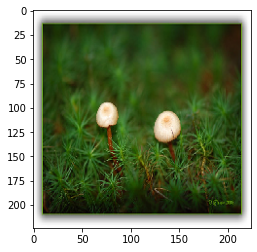

acorn (33.70%)


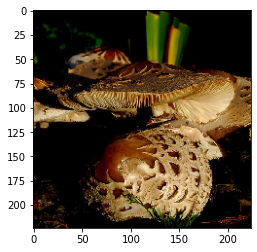

mushroom (71.41%)


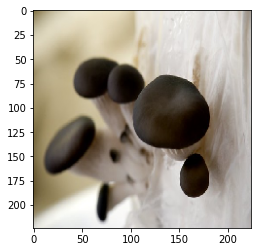

birdhouse (23.68%)


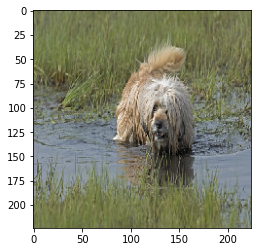

Tibetan_terrier (80.98%)


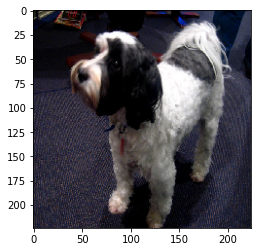

Tibetan_terrier (86.20%)


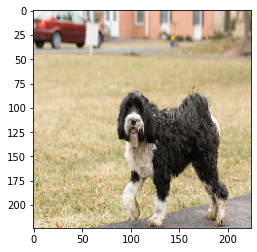

standard_poodle (23.26%)


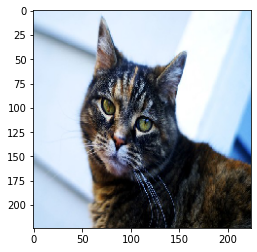

tabby (56.46%)


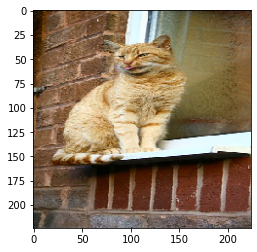

tiger_cat (39.90%)


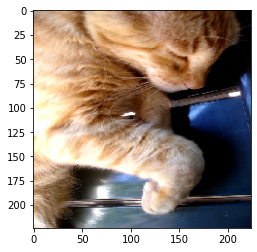

tiger_cat (18.95%)


In [34]:
from tensorflow.keras.applications import vgg16
from tensorflow import keras 
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D


# VGG16 모델 불러오기
model = vgg16.VGG16()

# 모델의 모양을 보여준다.
model.summary()

# 테스트 할 이미지 파일들
files = [
      'imagenet/mushroom1.jpg',
      'imagenet/mushroom2.jpg',
      'imagenet/mushroom3.jpg',
      'imagenet/dog1.jpg',
      'imagenet/dog2.jpg',
      'imagenet/dog3.jpg',
      'imagenet/cat1.jpg',
      'imagenet/cat2.jpg',
      'imagenet/cat3.jpg',
    ]

# 분류 실행
for file in files :
  predict_vgg16(model, file)  



In [35]:
!rm -rf dogs.tar.gz
!wget https://github.com/dhrim/cau_2022_summer/raw/main/material/deep_learning/dogs.tar.gz
!ls -al  

--2022-07-22 00:50:50--  https://github.com/dhrim/cau_2022_summer/raw/main/material/deep_learning/dogs.tar.gz
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-07-22 00:50:50 ERROR 404: Not Found.

total 20
drwxr-xr-x 1 root root 4096 Jul 22 00:50 .
drwxr-xr-x 1 root root 4096 Jul 21 23:55 ..
drwxr-xr-x 4 root root 4096 Jul 13 13:42 .config
drwxr-xr-x 2 root root 4096 Jul 22 00:50 imagenet
drwxr-xr-x 1 root root 4096 Jul 13 13:43 sample_data


In [36]:
!rm -rf dogs
!tar xvfz dogs.tar.gz
!ls -al dogs


tar (child): dogs.tar.gz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now
ls: cannot access 'dogs': No such file or directory


In [37]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import vgg16

In [38]:
def load_file_names_and_category_names(path):
  
  file_names = []
  category_names = []

  dir_names = os.listdir(path)
      
  for dir_name in dir_names:
    file_names_in_a_dir = os.listdir(path+"/"+dir_name)

    for a_file_name in file_names_in_a_dir:
      full_file_name = path+"/"+dir_name+"/"+a_file_name
      file_names.append(full_file_name)
      category_names.append(dir_name)

  combined = list(zip(file_names, category_names))
  random.shuffle(combined)
  file_names, category_names = zip(*combined)

  return file_names, category_names


def load_image_files_into_numpy_array(file_names):
  file_count = len(file_names)    
  data = np.ndarray(shape=(file_count,224,224,3), dtype=np.float64)    
  for i in range(len(file_names)):
    image = load_img(file_names[i], target_size=(224, 224))
    image = img_to_array(image)
    data[i] = image
  return data


def load_custom_data(path, train_ratio=0.8):
  
  file_names, category_names = load_file_names_and_category_names(path)
  x = load_image_files_into_numpy_array(file_names)
  
  labels, y = np.unique(category_names, return_inverse=True)  

  s = int(x.shape[0]*train_ratio)
  train_x, test_x = x[:s], x[s:]
  train_y, test_y = y[:s], y[s:]
  
  return (train_x, train_y), (test_x, test_y), labels

In [39]:
(train_x, train_y), (test_x, test_y), custom_labels = load_custom_data("dogs")

train_x = vgg16.preprocess_input(train_x)
test_x = vgg16.preprocess_input(test_x)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)
print(custom_labels)  

FileNotFoundError: ignored

In [40]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras import Model
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

from tensorflow.keras.applications import VGG16
# 모델 불러오기
conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.summary()

# Convolution Layer를 학습되지 않도록 고정 
for layer in conv_layers.layers:
    layer.trainable = False


# 새로운 모델 생성하기
model = keras.Sequential()

# VGG16모델의 Convolution Layer를 추가
model.add(conv_layers)
 
# 모델의 Fully Connected 부분을 재구성
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# 모델
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [41]:
# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="RMSprop",
              metrics=['acc'])

# 모델 학습
hist = model.fit(train_x, train_y, epochs=200, batch_size=64, shuffle=True, validation_split=0.1)

NameError: ignored

In [43]:
plt.plot(hist.history['loss'][5:])
plt.plot(hist.history['val_loss'][5:])
plt.show()

plt.plot(hist.history['accuracy'][5:])
plt.plot(hist.history['val_accuracy'][5:])
plt.show()

NameError: ignored

In [ ]:
print(y_.shape)

In [ ]:
import matplotlib.pyplot as plt

loss, acc = model.evaluate(test_x, test_y)
print("loss =",loss)
print("acc =",acc)

y_ = model.predict(test_x)

predicted = np.argmax(y_, axis=1)


# train_x, test_x는 vgg16.prerprocess_input()에 의해 변형되었다.
(_, _), (raw_test_x, _), custom_labels = load_custom_data("dogs")


for i in [0,50,100,150,200]:  
  print(test_y[i], custom_labels[test_y[i]])
  print(predicted[i], custom_labels[predicted[i]])
  plt.imshow(raw_test_x[i].astype(int))
  plt.show()

In [ ]:
def load_file_names_and_category_names(path):
  
  file_names = []
  category_names = []

  dir_names = os.listdir(path)
      
  for dir_name in dir_names:
    file_names_in_a_dir = os.listdir(path+"/"+dir_name)

    for a_file_name in file_names_in_a_dir:
      full_file_name = path+"/"+dir_name+"/"+a_file_name
      file_names.append(full_file_name)
      category_names.append(dir_name)

  return file_names, category_names


def load_image_files_into_numpy_array(file_names):
  file_count = len(file_names)    
  data = np.ndarray(shape=(file_count,224,224,3), dtype=np.float64)    
  for i in range(len(file_names)):
    image = load_img(file_names[i], target_size=(224, 224))
    image = img_to_array(image)
    data[i] = image
  return data


def load_custom_data(path, train_ratio=0.8):
  
  file_names, category_names = load_file_names_and_category_names(path)
  x = load_image_files_into_numpy_array(file_names)
  
  labels, y = np.unique(category_names, return_inverse=True)  

  s = int(x.shape[0]*train_ratio)
  train_x, test_x = x[:s], x[s:]
  train_y, test_y = y[:s], y[s:]
  
  return (train_x, train_y), (test_x, test_y), labels

In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications import VGG16

conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = keras.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])


(train_x, train_y), (test_x, test_y), custom_labels = load_custom_data("dogs")

train_x = vgg16.preprocess_input(train_x)
test_x = vgg16.preprocess_input(test_x)


model.fit(train_x, train_y, epochs=10, batch_size=64, shuffle=True)


loss, acc = model.evaluate(test_x, test_y)
print("loss =",loss)
print("acc =",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)
print(predicted[0], custom_labels[predicted[0]])

In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications import VGG16



conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = keras.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])


(train_x, train_y), (test_x, test_y), custom_labels = load_custom_data("dogs")

# train_x = vgg16.preprocess_input(train_x)
test_x = vgg16.preprocess_input(test_x)

# ADD START
data_aug_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=vgg16.preprocess_input # 여기에 preprocess 함수를 설정
)
# ADD END
 

#model.fit(train_x, train_y, epochs=10, batch_size=64, shuffle=True)
model.fit(data_aug_generator.flow(train_x, train_y, batch_size=64), epochs=10)


loss, acc = model.evaluate(test_x, test_y)
print("loss =",loss)
print("acc =",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)
print(predicted[0], custom_labels[predicted[0]])

In [ ]:
!rm -rf dogs_prepared.tar.gz
!wget https://github.com/dhrim/cau_2022_summer/raw/main/material/deep_learning/dogs_prepared.tar.gz
!ls -al  

In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications import VGG16


conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = keras.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])


# (train_x, train_y), (test_x, test_y), custom_labels = load_custom_data("dogs")

# train_x = vgg16.preprocess_input(train_x)
# test_x = vgg16.preprocess_input(test_x)


# ADD START
train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=vgg16.preprocess_input
).flow_from_directory(
      "dogs_prepared/train",
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=vgg16.preprocess_input
).flow_from_directory(
      "dogs_prepared/test",
      target_size=(224,224),
      batch_size=64,      
      class_mode='sparse'
)


# ADD END
 

#model.fit(train_x, train_y, epochs=10, batch_size=64, shuffle=True)
model.fit(
      train_data_generator,
      validation_data=test_data_generator,
      epochs=10
)

# loss, acc = model.evaluate(test_x, test_y)
loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)

# y_ = model.predict(test_x)
y_ = model.predict(test_data_generator)

custom_labels = list(test_data_generator.class_indices.keys()) # ADDED
predicted = np.argmax(y_, axis=1)
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])

In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications import VGG16


conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = keras.Sequential()

model.add(conv_layers)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])


train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=vgg16.preprocess_input
).flow_from_directory(
      "dogs_prepared/train",
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=vgg16.preprocess_input
).flow_from_directory(
      "dogs_prepared/test",
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)


model.fit(
      train_data_generator,
      validation_data=test_data_generator,
      epochs=10
)

loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)

y_ = model.predict(test_data_generator)

custom_labels = list(test_data_generator.class_indices.keys()) # ADDED
predicted = np.argmax(y_, axis=1)
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])

In [ ]:
test_data_generator = ImageDataGenerator(
      # 원 이미지를 그려주기 위해 전처리 함수를 사용 하지 않은 이미지를 읽는다.
      # 모델 호출 시에 직접 전처리 함수를 호출한다.
      # preprocessing_function=vgg16.preprocess_input
).flow_from_directory(
      "dogs_prepared/test",
      target_size=(224,224),
      batch_size=16,
      class_mode='sparse'
)


while True:
  # 한번에 batch_size 16개 만큼 꺼낸다.
  # test_x와 test_y에는 16개가 담겼다.
  test_x, test_y = next(test_data_generator)

  # 모델 호출하기 위해 전처리 함수를 호출하고
  preprocessed_test_x = vgg16.preprocess_input(test_x.copy())

  # 모델로 예측 하고
  y_ = model.predict(preprocessed_test_x)

  # category index를 구한다.
  predicted = np.argmax(y_, axis=1)

  # 16개 이미지에 대하여 각각 그려보고 정답과 예측 값을 출력한다.
  for i, a_image in enumerate(test_x):
    plt.imshow(a_image/255.0)
    plt.show()
    print("test_y =", test_y.astype(int)[i], ", predicted =", predicted[i])
  break

In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

# from tensorflow.keras.applications import vgg16
# from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import resnet50
from tensorflow.keras.applications import ResNet50


# conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = keras.Sequential()

model.add(conv_layers)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])


train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
#       preprocessing_function=vgg16.preprocess_input
      preprocessing_function=resnet50.preprocess_input
).flow_from_directory(
      "dogs_prepared/train",
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
#       preprocessing_function=vgg16.preprocess_input
      preprocessing_function=resnet50.preprocess_input
).flow_from_directory(
      "dogs_prepared/test",
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)


model.fit(
      train_data_generator,
      validation_data=test_data_generator,
      epochs=10
)

loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)

y_ = model.predict(test_data_generator)

custom_labels = list(test_data_generator.class_indices.keys())
predicted = np.argmax(y_, axis=1)
print(predicted[0], custom_labels[predicted[0]])